# Finding linguistic patterns using spaCy

This section teaches you to find linguistic patterns using spaCy, a natural language processing library for Python.

If you are unfamiliar with the linguistic annotations produced by spaCy or need to refresh your memory, revisit [Part II](../part_ii/03_basic_nlp.ipynb) before working through this section.

After reading this section, you should:

 - know how to search for patterns based on part-of-speech tags and morphological features
 - know how to search for patterns based on syntactic dependencies
 - know how to examine the matching patterns in their context of occurrence

## Finding patterns using spaCy Matchers


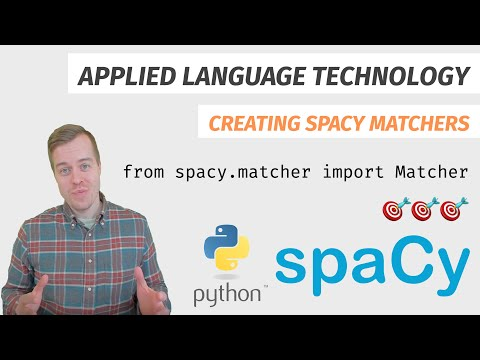

In [1]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('aVPMzk2rCP4', height=350, width=600)

Linguistic annotations, such as part-of-speech tags, syntactic dependencies and morphological features, help impose structure on written language. Crucially, linguistic annotations allow searching for structural patterns instead of individual words or phrases. This allows defining search patterns in a flexible way.

In the spaCy library, the capability for pattern search is provided by various components named *Matchers*.

spaCy provides three types of *Matchers*:

1. A [Matcher](https://spacy.io/api/matcher), which allows defining rules that search for particular **words or phrases** by examining *Token* attributes.  
2. A [DependencyMatcher](https://spacy.io/api/dependencymatcher), which allows searching parse trees for **syntactic patterns**.
3. A [PhraseMatcher](https://spacy.io/api/phrasematcher), a fast method for matching spaCy *Doc* objects to *Doc* objects.

The following sections show you how to use the *Matcher* for matching *Tokens* and their sequences based on their part-of-speech tags and morphological features, and how to use the *DependencyMatcher* for matching syntactic dependencies. 

### Matching words or phrases

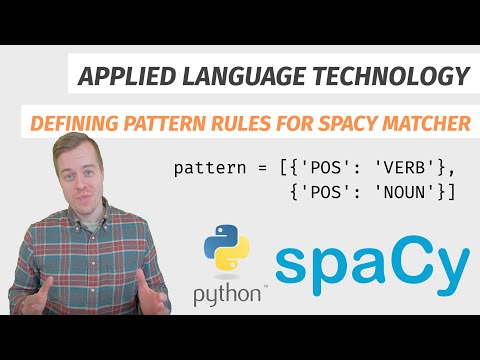

In [2]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('YT7GMDjPlrw', height=350, width=600)

To get started with the *Matcher*, let's import the spaCy library and load a small language model for English.

In [ ]:
# Import the spaCy library into Python
import spacy

# Load a small language model for English; assign the result under 'nlp'
nlp = spacy.load('en_core_web_sm')

To have some data to work with, let's load some text from a Wikipedia article.

To do so, we use Python's `open()` function to open the file for reading, providing the `file`, `mode` and `encoding` arguments, as instructed in [Part II](../part_ii/01_basic_text_processing.ipynb#Loading-plain-text-files-into-Python).

We then call the `read()` method to read the file contents and store the result under the variable `text`.

In [ ]:
# Use the open() function to open the file for reading, followed by the
# read() method to read the contents of the file.
text = open(file='data/occupy.txt', mode='r', encoding='utf-8').read()

This returns a Python string object that contains the article in plain text, which is now available under the variable `text`.

Next, we then feed this object to the language model under the variable `nlp` as instructed in [Part II](../part_ii/03_basic_nlp.ipynb#Performing-basic-NLP-tasks-using-spaCy).

We also use Python's `len()` function to count the number of words in the text.

In [ ]:
# Feed the string object to the language model
doc = nlp(text)

# Use the len() function to check length of the Doc object to count 
# how many Tokens are contained within the Doc.
len(doc)

Now that we have a spaCy *Doc* object with nearly 15 000 *Tokens*, we can continue to import the *Matcher* class from the `matcher` submodule of spaCy.

In [ ]:
# Import the Matcher class
from spacy.matcher import Matcher

Importing the *Matcher* class from spaCy's `matcher` submodule allows creating *Matcher* objects.

When creating a *Matcher* object, you must provide the vocabulary of the language model used for finding matches to the *Matcher* object.

The reason for this is really rather simple: if you want to search for patterns in some language, you need to know its vocabulary first.

spaCy stores the vocabulary of a model in a [*Vocab*](https://spacy.io/api/vocab) object. The *Vocab* object can be found under the attribute `vocab` of a spaCy *Language* object, which was introduced in [Part II](../part_ii/03_basic_nlp.ipynb#Performing-basic-NLP-tasks-using-spaCy).

In this case, we have the *Language* object that contains a small language model for English stored under the variable `nlp`, which means we can access its *Vocab* object under the attribute `nlp.vocab`.

We then call the *Matcher* **class** and provide the vocabulary under `nlp.vocab` to the `vocab` argument to create a *Matcher* object. We store the resulting object under the variable `matcher`.

In [ ]:
# Create a Matcher and provide model vocabulary; assign result under the variable 'matcher'
matcher = Matcher(vocab=nlp.vocab)

# Call the variable to examine the object
matcher

The *Matcher* object is now ready to store the patterns that we want to search for.

These patterns, or more specifically, *pattern rules*, are created using a [specific format](https://spacy.io/api/matcher#patterns) defined in spaCy.

Each pattern consists of a Python list, which is populated by Python dictionaries. 

Each dictionary in this list describes the pattern for matching a single spaCy *Token*. 

If you wish to match a sequence of *Tokens*, you must define multiple dictionaries within a single list, whose order follows that of the pattern to be matched.

Let's start by defining a simple pattern for matching sequences of pronouns and verbs, and store this pattern under the variable `pronoun_verb`.

This pattern consists of a list, as marked by the surrounding brackets `[]`, which contains two dictionaries, marked by curly braces `{}` and separated by a comma. The key and value pairs in a dictionary are separated by a colon.

 - The dictionary key determines which *Token* attribute should be searched for matches. The attributes supported by the *Matcher* can be found [here](https://spacy.io/api/matcher#patterns).

 - The value under the dictionary key determines the specific value for the attribute.

In this case, we define a pattern that searches for a sequence of two coarse part-of-speech tags (`POS`), which were introduced in [Part II](../part_ii/03_basic_nlp.ipynb#Part-of-speech-tagging), namely pronouns (`PRON`) and verbs (`VERB`).

Note that both keys and values must be provided in uppercase letters.

In [ ]:
# Define a list with nested dictionaries that contains the pattern to be matched
pronoun_verb = [{'POS': 'PRON'}, {'POS': 'VERB'}]

Now that we have defined the pattern using a list and dictionaries, we can add it to the *Matcher* object under the variable `matcher`.

This can be achieved using `add()` method, which requires two inputs:

 1. A Python string object that defines a name for the pattern. This is required for purposes of identification.
 2. A list containing the pattern(s) to be searched for. Because a single rule for matching patterns can contain multiple patterns, the input must be a *list of lists*. We therefore wrap the input lists into brackets, e.g. `[pattern_1]`.

In [ ]:
# Add the pattern to the matcher under the name 'pronoun+verb'
matcher.add("pronoun+verb", patterns=[pronoun_verb])

To search for matches in the *Doc* object stored under the variable `doc`, we feed the *Doc* object to the *Matcher* and store the result under the variable `result`.

We also set the optional argument `as_spans` to `True`, which instructs spaCy to return the results as *Span* objects.

As you may remember from [Part II](../part_ii/03_basic_nlp.ipynb#Named-entity-recognition-(NER)), *Span* objects correspond to continuous "slices" of *Doc* objects.

In [ ]:
# Apply the Matcher to the Doc object under 'doc'; provide the argument
# 'as_spans' and set its value to True to get Spans as output
result = matcher(doc, as_spans=True)

# Call the variable to examine the output
result

The output is a list of spaCy *Span* objects that match the requested pattern. Let's examine the first object in the list of matches in greater detail.

In [ ]:
result[0]

The *Span* object has various useful [attributes](https://spacy.io/api/span), including `start` and `end`. These attributes contain the indices that indicate where in the *Doc* object the *Span* starts and finishes.

In [ ]:
result[0].start, result[0].end

Another useful attribute is `label`, which contains the name that we gave to the pattern. Let's take a closer look at this attribute.

In [ ]:
result[0].label

The number stored under the `label` attribute is actually a spaCy [*Lexeme*](https://spacy.io/api/lexeme) object that corresponds to an entry in the language model's vocabulary. 

This *Lexeme* contains the name that we gave to the search pattern above, namely `pronoun+verb`.

We can easily verify this by using the value under `result[0].label` to fetch the *Lexeme* from the *Vocab* object under `nlp.vocab` and examining its `text` attribute.

In [ ]:
# Access the model vocabulary using brackets; provide the value under 'result[0].label' as key.
# Then get the 'text' attribute for the Lexeme object, which contains the lexeme in a human-readable form.
nlp.vocab[result[0].label].text

The information under the `label` attribute is useful for disambiguating between patterns, especially if the same *Matcher* object contains multiple different patterns, as we will see shortly below.

Looking at the matches above, the pattern we defined is quite restrictive, as the pronoun and the verb must follow each other.

We cannot, for example, match patterns in which the verb is preceded by auxiliary verbs.

spaCy allows increasing the flexibility of pattern rules using operators. 

These operators are defined by adding the key `OP` to the dictionary that defines a pattern for a single *Token*. spaCy supports the following operators:

 - `!`: Negate the pattern; the pattern can occur exactly zero times.
 - `?`: Make the pattern optional; the pattern may occur zero or one times.
 - `+`: Require the pattern to occur one or more times.
 - `*`: Allow the pattern to match zero or more times.

Let's explore the use of operators by defining another pattern rule, which extends the scope of our *Matcher*.

To do so, we define another pattern for a *Token* between the pronoun and the verb. This *Token* must have the coarse part-of-speech tag `AUX`, which indicates an auxiliary verb:

```python
{'POS': 'AUX', 'OP': '+'}
```

In addition, we add another key and value pair to the dictionary for this *Token*, which contains the key `OP` with the value `+`. This means that the *Token* corresponding to an auxiliary verb must occur *one or more times*.

We store the resulting list with nested dictionaries under the variable `pronoun_aux_verb`, and add the pattern to the existing *Matcher* object stored under the variable `matcher`.

In [ ]:
# Define a list with nested dictionaries that contains the pattern to be matched
pronoun_aux_verb = [{'POS': 'PRON'}, {'POS': 'AUX', 'OP': '+'}, {'POS': 'VERB'}]

# Add the pattern to the matcher under the name 'pronoun+aux+verb'
matcher.add('pronoun+aux+verb', patterns=[pronoun_aux_verb])

# Apply the Matcher to the Doc object under 'doc'; provide the argument 'as_spans'
# and set its value to True to get Spans as output. Overwrite previous matches by
# storing the result under the variable 'results'.
results = matcher(doc, as_spans=True)

Just as above, the *Matcher* returns a list of spaCy *Span* objects.

Let's loop over each item in the list `results`. We use the variable `result` to refer to the individual *Span* objects in the list, which contain our matches.

We first retrieve the *Lexeme* object stored under `result.label`, which we map to the language model's *Vocabulary* under `nlp.vocab`. 

As we learned above, this *Lexeme* corresponds to the name that we gave to the pattern rule, whose human-readable form can be found under the attribute `text`.

We then print a tabulator character to insert some space between the name of the pattern and the *Span* object containing the match.

In [ ]:
# Loop over each Span object in the list 'results'
for result in results:
    
    # Print out the the name of the pattern rule, a tabulator character, and the matching Span
    print(nlp.vocab[result.label].text, '\t', result)

The output shows that the pattern we added to the *Matcher* matches patterns that contain one (e.g. "we *can* build") or more (e.g. "they *have been* protesting") auxiliaries!

### Matching morphological features

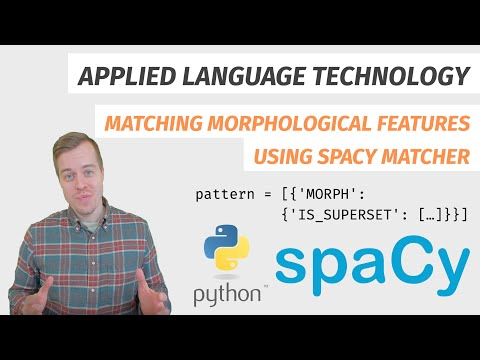

In [3]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('9WbONZ8iJlc', height=350, width=600)

As introduced in [Part II](../part_ii/03_basic_nlp.ipynb#Morphological-analysis), spaCy can also perform morphological analysis, whose results are stored under the attribute `morph` of a *Token* object.

The `morph` attribute contains a string object, in which each morphological feature is separated by a vertical bar `|`, as illustrated below.

```
We 	 Case=Nom|Number=Plur|Person=1|PronType=Prs
```

As you can see, particular types of morphological features, e.g. *Case*, and their type, e.g. *Nom* (for the nominative case) are separated by equal signs `=`.

Let's begin exploring how we can define pattern rules that match morphological features.

To get started, we create a new *Matcher* object named `morph_matcher`.

In [ ]:
# Create a Matcher and provide model vocabulary; assign result under the variable 'morph_matcher'
morph_matcher = Matcher(vocab=nlp.vocab)

We then define a new pattern with rules for two *Tokens*:

 1. Tokens that have a fine-grained part-of-speech tag `NNP` (proper noun), which can occur one or more times (operator: `+`).
 
 ```python
 {'TAG': 'NNP', 'OP': '+'}
 ```
 
 
 2. Tokens that have a coarse part-of-speech tag `VERB` and have *all* the following morphological features (`MORPH`): `Number=Sing|Person=Three|Tense=Pres|VerbForm=Fin`.
 
 ```python
 {'POS': 'VERB', 'MORPH': 'Number=Sing|Person=Three|Tense=Pres|VerbForm=Fin'}
 ```
 
We define the pattern using two dictionaries in a list, which we assign under the variable `propn_3rd_finite`.

In [ ]:
# Define a list with nested dictionaries that contains the pattern to be matched
propn_3rd_finite = [{'TAG': 'NNP', 'OP': '+'},
                    {'POS': 'VERB', 'MORPH': 'Number=Sing|Person=Three|Tense=Pres|VerbForm=Fin'}]

We then add the pattern to the newly-created *Matcher* stored under the variable `morph_matcher` using the `add()` method.

We also provide the value `LONGEST` to the optional argument `greedy` for the `add()` method.

The `greedy` argument filters the matches for *Tokens* that include operators such as `+` that search *greedily* for more than one match.

By setting the value to `LONGEST`, spaCy returns the longest sequence of matches instead of returning a match every time it finds one. Put differently, spaCy will collect all the matching *Tokens* before returning them.

In [ ]:
# Add the pattern to the matcher under the name 'sing_3rd_pres_fin'
morph_matcher.add('sing_3rd_pres_fin', patterns=[propn_3rd_finite], greedy='LONGEST')

We then apply the *Matcher* to the data stored under the variable `doc`.

In [ ]:
# Apply the Matcher to the Doc object under 'doc'; provide the argument 'as_spans'
# and set its value to True to get Spans as output. Overwrite previous matches by
# storing the result under the variable 'results'.
morph_results = morph_matcher(doc, as_spans=True)

# Loop over each Span object in the list 'morph_results'
for result in morph_results:

    # Print result
    print(result)

As you can see, the matches are relatively few in number, because we defined that the verb should have quite specific morphological features.

The question is, then, how can we match just *some* morphological features?

To loosen the criteria for morphological features by focusing on [tense](https://en.wikipedia.org/wiki/Grammatical_tense) only, we need to use a dictionary with the key `MORPH`, but instead of a string object, we provide a dictionary as its value:

For this dictionary, we use the string `IS_SUPERSET` as the key. `IS_SUPERSET` is one of the attributes defined in the spaCy [pattern format](https://spacy.io/api/matcher#patterns), e.g.

```python
{'MORPH': {'IS_SUPERSET': [...]}}
```

Before proceeding any further, let's unpack the logic behind `IS_SUPERSET` a bit.

We can think of morphological features associated with a given Token as a [set](https://en.wikipedia.org/wiki/Set_(mathematics)). To exemplify, a set could consist of the following four items:

```
Number=Sing, Person=Three, Tense=Pres, VerbForm=Fin
```

If we would have *another set* with just one item, `Tense=Pres`, we could describe the relationship between the two sets by stating that the first set (with four items) is a superset of the second set (with one item).

In other words, the larger (super)set contains the smaller (sub)set.

This is also how matching using `IS_SUPERSET` works: spaCy retrieves the morphological features for each *Token*, and examines whether these features are a superset of the features defined in the search pattern.

The morphological features to be searched for are provided as a list of Python strings.

These strings, in turn, define particular morphological features, e.g. `Tense=Past`, as defined in the [Universal Dependencies](https://universaldependencies.org/u/overview/morphology.html) schema for describing morphology.

This list is then used as the value for the key `IS_SUPERSET`.

Let's now proceed to search for verbs in the past tense and add them to the *Matcher* object under `morph_matcher`.

In [ ]:
# Define a list with nested dictionaries that contains the pattern to be matched
past_tense = [{'TAG': 'NNP', 'OP': '+'},
              {'POS': 'VERB', 'MORPH': {'IS_SUPERSET': ['Tense=Past']}}]

# Add the pattern to the matcher under the name 'past_tense'
morph_matcher.add('past_tense', patterns=[past_tense], greedy='LONGEST')

# Apply the Matcher to the Doc object under 'doc'; provide the argument 'as_spans'
# and set its value to True to get Spans as output. Overwrite previous matches by
# storing the result under the variable 'results'.
morph_results = morph_matcher(doc, as_spans=True)

Let's loop over the results and print out the name of the pattern, the *Span* object containing the match, and the morphological features of the final *Token* in the match, which corresponds to the verb.

In [ ]:
# Loop over each Span object in the list 'results'
for result in morph_results:
    
    # Print out the the name of the pattern rule, a tabulator character, and the matching Span.
    # Finally, print another tabulator character, followed by the morphological features of the
    # last Token in the match (a verb).
    print(nlp.vocab[result.label].text, '\t', result, '\t', result[-1].morph)

As you can see, the `past_tense` pattern can match objects based on a single morphological feature, although most matches share another morphological feature, namely the finite form. 

### Matching syntactic dependencies

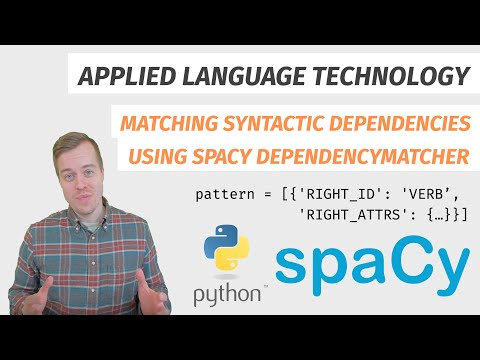

In [4]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('gUbMI52bIMY', height=350, width=600)

If you want to match patterns based on syntactic dependencies, you must use the *DependencyMatcher* class in spaCy.

As we learned in [Part II](../notebooks/part_ii/03_basic_nlp.ipynb#Syntactic-parsing), syntactic dependencies describe the relations that hold between *Token* objects.

To get started, let's import the *DependencyMatcher* class from the `matcher` submodule.

As you can see, the *DependencyMatcher* is initialised just as like the *Matcher* above.

In [ ]:
# Import the DependencyMatcher class
from spacy.matcher import DependencyMatcher

# Create a DependencyMatcher and provide model vocabulary; 
# assign result under the variable 'dep_matcher'
dep_matcher = DependencyMatcher(vocab=nlp.vocab)

This provides us with a *DependencyMatcher* stored under the variable `dep_matcher`, which is now ready for storing dependency patterns.

When developing pattern rules for matching syntactic dependencies, the first step is to determine an "anchor" around which the pattern is built.

Visualising the syntactic dependencies, as instructed in [Part II](../part_ii/03_basic_nlp.ipynb#Syntactic-parsing), can help formulate patterns. 

Let's import the displacy submodule to draw the syntactic dependencies for a sentence in the *Doc* object stored under the variable `doc`.

In [ ]:
# Import the displacy submodule from spaCy
from spacy import displacy

# Cast the sentences contained in the Doc object into a list; take the sentence
# at index 420. Set the 'style' attribute to 'dep' to draw syntactic dependencies. 
displacy.render(list(doc.sents)[420], style='dep')

As introduced in [Part II](../notebooks/part_ii/03_basic_nlp.ipynb#Syntactic-parsing), syntactic dependencies are visualised using arcs that lead from the *head* *Token* to the *dependent* *Token*. The label of the arc gives the syntactic dependency.

To exemplify, the verb "took" governs the proper noun "Coleraine", which is the nominal subject of the sentence. "Coleraine", in turn governs the proper noun "Occupy", which form a compound noun.

Let's define a pattern that searches for verbs and their nominal subjects (`nsubj`).

Just as using the *Matcher* class, the pattern rules for the *DependencyMatcher* are defined using a list of dictionaries.

The first dictionary in the list defines an "anchor" pattern and its attributes.

You can think of the pattern rule as a chain that proceeds from left to right, and the first pattern on the left acts as an anchor for the subsequent patterns on its right-hand side.

Hence we define the following pattern for the anchor:

```python
{'RIGHT_ID': 'verb', 'RIGHT_ATTRS': {'POS': 'VERB'}}
```

We use the required key `RIGHT_ID` to provide a name for this pattern, which can be then used to refer to this pattern by subsequent patterns on its **right-hand side**.

In other words, when you see the key `RIGHT_ID`, think of a name for the *current pattern*.

We then create a dictionary under the key `RIGHT_ATTRS` that holds the linguistic features of the anchor. In this case, we determine that the anchor should have `VERB` as its part-of-speech tag.

Next, we determine a pattern for the next "link" in the chain to the right of the anchor:

```python
{'LEFT_ID': 'verb', 'REL_OP': '>', 'RIGHT_ID': 'subject', 'RIGHT_ATTRS': {'DEP': 'nsubj'}}
```

We start by providing the key `LEFT_ID`, whose value is a string object that refers to the name of a pattern on the **left-hand side** of the current pattern. This is the name that we gave to the anchor using the key `RIGHT_ID`.

Next, we use the key `REL_OP` to define a [relation operator](https://spacy.io/api/dependencymatcher#patterns), which determines the relationship between this pattern and that referred to using `LEFT_ID`.

The relation operator `>` defines that the pattern under `LEFT_ID` – the anchor – should be the head of the current pattern.

Next, we name the current pattern using the key `RIGHT_ID`, which enables referring to this pattern on the right-hand side, if necessary. We give this pattern the name `subject`.

We then use the `RIGHT_ATTRS` to determine the attributes for the current pattern. We define that the syntactic relation that holds between this pattern and that on the left should be `nsubj` or nominal subject.

In [ ]:
# Define a list with nested dictionaries that contains the pattern to be matched
dep_pattern = [{'RIGHT_ID': 'verb', 'RIGHT_ATTRS': {'POS': 'VERB'}},
               {'LEFT_ID': 'verb', 'REL_OP': '>', 'RIGHT_ID': 'subject', 'RIGHT_ATTRS': {'DEP': 'nsubj'}}
              ]

We then compile these two dictionaries into a list, add the pattern to the *DependencyMatcher* under `dep_matcher` and search the *Doc* object `doc` for matches. 

We store the resulting matches under the variable `dep_matches` and call this variable to examine the output.

In [ ]:
# Add the pattern to the matcher under the name 'nsubj_verb'
dep_matcher.add('nsubj_verb', patterns=[dep_pattern])

# Apply the DependencyMatcher to the Doc object under 'doc'; Store the result 
# under the variable 'dep_matches'.
dep_matches = dep_matcher(doc)

# Call the variable to examine the output
dep_matches

Unlike the *Matcher*, the *DependencyMatcher* cannot return the matches as *Span* objects, because the matches do not necessarily form a continuous sequence of *Tokens* needed for a *Span* object.

Thus the *DependencyMatcher* returns a list of tuples. 

Each tuple contains two items:

 1. A *Lexeme* object that gives the name of the pattern
 2. A list of indices for *Tokens* that match the search pattern in the *Doc* object

In [ ]:
# Loop over each tuple in the list 'dep_matches'
for match in dep_matches:
    
    # Take the first item in the tuple at [0] and assign it under
    # the variable 'pattern_name'. This item is a spaCy Lexeme object.
    pattern_name = match[0]
    
    # Take the second item in the tuple at [1] and assign it under
    # the variable 'matches'. This is a list of indices referring to the
    # Doc object under 'doc' that we just matched.
    matches = match[1]
    
    # Let's unpack the matches list into variables for clarity
    verb, subject = matches[0], matches[1]
    
    # Print the matches by first fetching the name of the pattern from the 
    # Vocabulary object. Next, use the 'subject' and 'verb' variables to 
    # index the Doc object. This gives us the actual Tokens matched. Use a
    # tabulator ('\t') and some stops ('...') to separate the output.
    print(nlp.vocab[pattern_name].text, '\t', doc[subject], '...', doc[verb])

This returns us the verbs and their nominal subjects.

Note that when defining pattern rules for dependency matching, you can also create new "chains" that start from the anchor pattern.

For example, to find the direct objects (`dobj`) for the verbs matched above, we should **not** add this as a link to the existing chain whose rightmost item is currently named `subject`.

Instead, we need to start a new chain that begins from the anchor pattern `verb`.

```python
{'LEFT_ID': 'verb', 'REL_OP': '>', 'RIGHT_ID': 'd_object', 'RIGHT_ATTRS': {'DEP': 'dobj'}}
```

Just as above, we define that this pattern should be on the right-hand side of the pattern `verb`, essentially starting a new chain. 

Furthermore, the pattern `verb` should govern this node (`>`) and have the relation `dobj`. We also name this pattern `d_object` using the `RIGHT_ID` attribute.

Let's define a new pattern and add it to the *DependencyMatcher* object.

In [ ]:
# Define a list with nested dictionaries that contains the pattern to be matched
dep_pattern_2 = [{'RIGHT_ID': 'verb', 'RIGHT_ATTRS': {'POS': 'VERB'}},
                 {'LEFT_ID': 'verb', 'REL_OP': '>', 'RIGHT_ID': 'subject', 'RIGHT_ATTRS': {'DEP': 'nsubj'}},
                 {'LEFT_ID': 'verb', 'REL_OP': '>', 'RIGHT_ID': 'd_object', 'RIGHT_ATTRS': {'DEP': 'dobj'}}
                ]

# Add the pattern to the matcher under the name 'nsubj_verb'
dep_matcher.add('nsubj_verb_dobj', patterns=[dep_pattern_2])

# Apply the DependencyMatcher to the Doc object under 'doc'; Store the result 
# under the variable 'dep_matches'.
dep_matches = dep_matcher(doc)

# Loop over each tuple in the list 'dep_matches'
for match in dep_matches:
    
    # Take the first item in the tuple at [0] and assign it under
    # the variable 'pattern_name'. This item is a spaCy Lexeme object.
    pattern_name = match[0]
    
    # Take the second item in the tuple at [1] and assign it under
    # the variable 'matches'. This is a list of indices referring to the
    # Doc object under 'doc' that we just matched.
    matches = match[1]

    # Because we now have two patterns for matching which return lists of
    # different length, e.g. lists with two indices for 'nsubj_verb' and
    # lists with three indices for 'nsubj_verb_dobj', we must now define
    # conditional criteria for handling these lists.
    if len(matches) > 2:
        
        # Let's unpack the matches list into variables for clarity
        verb, subject, dobject = matches[0], matches[1], matches[2]
    
        # Print the matches by first fetching the name of the pattern from the 
        # Vocabulary object. Next, use the 'subject' and 'verb' variables to 
        # index the Doc object. This gives us the actual Tokens matched. Use a
        # tabulator ('\t') and some stops ('...') to separate the output.
        print(nlp.vocab[pattern_name].text, '\t', doc[subject], '...', doc[verb], '...', doc[dobject])
        
    # Alternative condition with just two items in the list.
    else:
        
        # Let's unpack the matches list into variables for clarity
        verb, subject = matches[0], matches[1]
    
        # Print the matches by first fetching the name of the pattern from the 
        # Vocabulary object. Next, use the 'subject' and 'verb' variables to 
        # index the Doc object. This gives us the actual Tokens matched. Use a
        # tabulator ('\t') and some stops ('...') to separate the output.
        print(nlp.vocab[pattern_name].text, '\t', doc[subject], '...', doc[verb])

As the output shows, the pattern `nsubj_verb_dobj` returns both nominal subjects and direct objects of the verbs, which we defined using different "chains" of the pattern.

We could easily add another chain to the anchor pattern, for example, to search for prepositional phrases, or add further links to either of the existing chains to search for some more fine-grained features. 

## Examining matches in context using concordances

We can examine matches in their context of occurrence using *concordances*. In corpus linguistics, concordances are often understood as lines of text that show a match in its context of occurrence.

These concordance lines can help understand why and how a particular token or structure is used in given context.

To create concordance lines using spaCy, let's start by importing the Printer class from wasabi, which is a small [Python library](https://pypi.org/project/wasabi/) that spaCy uses for colouring and formatting messages. We will use wasabi to highlight the matches in the concordance lines.

We first initialise a *Printer* object, which we then assign under the variable `match`. Next, we test the *Printer* object by printing some text in red colour.

In [ ]:
# Import the Printer class from wasabi
from wasabi import Printer

# Initialise a Printer object; assign the object under the variable 'match'
match = Printer()

# Use the Printer to print out some text in red colour
match.text("Hello world!", color="red")

We then proceed to loop over the results returned by the *Matcher* object `morph_matcher`. As we learned above, the results consist of *Span* objects in a list, which are stored under the variable `morph_results`.

We loop over items in this list and use the `enumerate()` function to keep track of their count. We also provide the argument `start` with the value 1 to the `enumerate()` function to start counting from the number 1.

During the loop, we refer to this count using the variable `i` and to the *Span* object as `result`. The number under `i` is incremented with every *Span* object.

We then print out the following output for each *Span* object in the list `morph_results`:

 1. `i`: The number of the item in the list.
 2. `doc[result.start - 7: result.start]`: A slice of the *Doc* object stored under the variable `doc`, which we searched for matches. As usual, we define a slice using brackets and separate the start and end of a slice using a colon. We take a slice that begins 7 *Tokens* before the start of the match (`result.start - 7`), and terminates at the start of the match `result.start`.
 3. `match.text(result, color="red", no_print=True)`: The matching *Span* object, rendered using the wasabi *Printer* object `match` in red colour. We also set the argument `no_print` to `True` to prevent wasabi from printing the output on a new line.
 4. `doc[result.end: result.end + 7]`: Another slice of the *Doc* object stored under the variable `doc`. Here we take a slice that begins at the end of the match `result.end` and terminates 7 *Tokens* after the end of the match (`result.end + 7`).
 
Essentially, we use the indices available under `start` and `end` attributes of each *Span* to retrieve the linguistic context in which the *Span* occurs.  

In [ ]:
# Loop over the matches in 'morph_results' and keep count of items
for i, result in enumerate(morph_results, start=1):
    
    # Print following information for each match
    print(i,  # Item number being looped over
          doc[result.start - 7: result.start],  # The slice of the Doc preceding the match
          match.text(result, color="red", no_print=True),  # The match, rendered in red colour using wasabi
          doc[result.end: result.end + 7]  # The slice of the Doc following the match
         )

This returns a set of concordance lines highlighting the matches in their context of occurrence.

Note that in some cases, the preceding or following *Tokens* consist of line breaks indicating a paragraph break, which causes the output to jump a row or two.

This section should have given you an idea of how to search linguistic annotations for matching structures using spaCy. 

In the [following section](../part_iii/03_embeddings.ipynb), you will be introduced to word embeddings, a technique for approximating the meaning of words.